In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import pandas as pd
import yaml
from flarefly.data_handler import DataHandler
from flarefly.fitter import F2MassFitter

/home/fchinu/.virtualenv/ml/lib/python3.8/site-packages/zfit/__init__.py:63: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


In [2]:
configCutsName = "/home/fchinu/Run3/Ds_pp_13TeV/Projections_RawYields/configs/cutset_pp13TeV_binary.yml"
projectionsName = "/home/fchinu/Run3/Ds_pp_13TeV/Projections_RawYields/Data/Projections_Data.root"
configFitName = "/home/fchinu/Run3/Ds_pp_13TeV/Projections_RawYields/configs/config_Ds_Fit_pp13TeV.yml"

In [3]:
# Load the configs
with open(configCutsName, 'r') as stream:
    configCuts = yaml.safe_load(stream)
with open(configFitName, 'r') as stream:
    configFit = yaml.safe_load(stream)

[[<Axes: >, <Axes: >]]


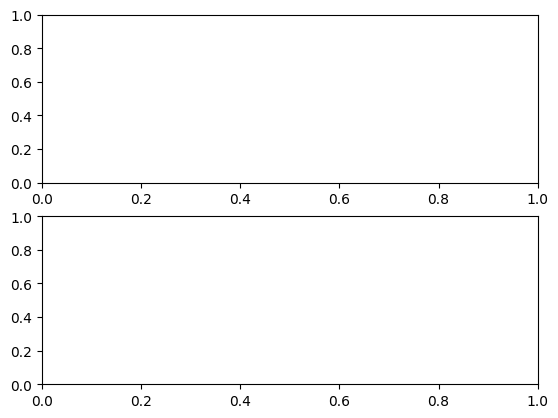

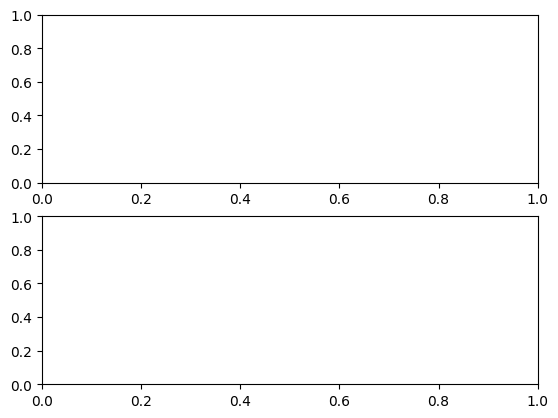

In [6]:
figMass, axMass, figResiduals, axResiduals = [], [], [], []
for iCanv in range(1):
    nPads = 2
    figMass.append(plt.figure())
    axMass.append([figMass[iCanv].add_subplot(nPads, 1, i+1) for i in range(nPads)])
    figResiduals.append(plt.figure())
    axResiduals.append([figResiduals[iCanv].add_subplot(nPads, 1, i+1) for i in range(nPads)])
print(axMass)

In [7]:
# define PDFs lists
signal_pdfs = ["gaussian", "gaussian"]
background_pdfs = ["chebpol3"]

# define the ids
DplusId = 0 # because signal_pdfs[gaussian_id] = "gaussian"
DsId = 1 # because signal_pdfs[gaussian_id] = "gaussian"
expo_id = 0     # because background_pdfs[expo_id] = "expo"
start = 0

In [8]:
fitters = []
start = start+1

for iPt, (ptMin, ptMax) in enumerate(zip(configFit["pp13TeVPrompt"]["PtMin"][0:1], configFit["pp13TeVPrompt"]["PtMax"][0:1])):

    dataHandler = DataHandler(data=projectionsName, var_name="fM", histoname=f'hMass_{ptMin*10:.0f}_{ptMax*10:.0f}', limits=[1.71,2.1], rebin=4)
    # Fit the data
    fitters.append(F2MassFitter(data_handler=dataHandler,
                                name_signal_pdf=signal_pdfs,
                                name_background_pdf=background_pdfs,
                                name=f"{iPt+start}{background_pdfs[expo_id]}_{signal_pdfs[DplusId]}_{signal_pdfs[DsId]}"))
    fitters[iPt].set_particle_mass(DsId, mass = 1.968)
    fitters[iPt].set_particle_mass(DplusId, mass = 1.868)
    fitters[iPt].set_signal_initpar(DsId, "sigma", 0.01, limits=[0.001, 0.04])
    fitters[iPt].set_signal_initpar(DplusId, "sigma", 0.01, limits=[0.001, 0.04])

    fitters[iPt].set_background_initpar(expo_id, "c0", -5, fix=False)
    fitters[iPt].set_background_initpar(expo_id, "c1", 2, fix=False)
    fitters[iPt].set_background_initpar(expo_id, "c2", -0.4, fix=False)
    fitters[iPt].set_background_initpar(expo_id, "c3", -0.4, fix=False)
    fitters[iPt].mass_zfit()
    # Print the results
    print(f"Pt: {ptMin} - {ptMax}")
    print(f"Signal yields: {fitters[iPt].get_raw_yield(DplusId)}")
    print(f"Signal yields: {fitters[iPt].get_raw_yield(DsId)}")
    #print(f"Background yields: {fitters[iPt].backgroundYields[expo_id]}")
    #print(f"Signal significance: {fitters[iPt].signalSignificance[DplusId]}")
    #print(f"Signal significance: {fitters[iPt].signalSignificance[DsId]}")
    #print(f"Chi2: {fitters[iPt].chi2}")
    #print(f"Chi2/ndf: {fitters[iPt].chi2/fitters[iPt].ndf}")

I MnSeedGenerator Computing seed using NumericalGradient calculator
I MnSeedGenerator Initial state: FCN =      -708177.8279 Edm =        12577.4929 NCalls =     35
I MnSeedGenerator Initial state  
  Minimum value : -708177.8279
  Edm           : 12577.4929
  Internal parameters:	[     -0.927295213     -0.927295213      -1.56806283    -0.5686103035     -1.567990617    -0.5686103035           -5e-06            2e-06  -4.00000006e-07  -4.00000006e-07]	
  Internal gradient  :	[      13077.95645      4633.169824      6492667.259     -2270.417604      90806935.11     -4592.302229       2050945203       4352420551     -271643615.1      -3602572760]	
  Internal covariance matrix:
[[  3.4330551e-05              0              0              0              0              0              0              0              0              0]
 [              0  3.0793973e-05              0              0              0              0              0              0              0              0]
 [       

In [6]:
import flarefly
flarefly.__file__

'/home/fchinu/.virtualenv/ml/lib/python3.8/site-packages/flarefly/__init__.py'

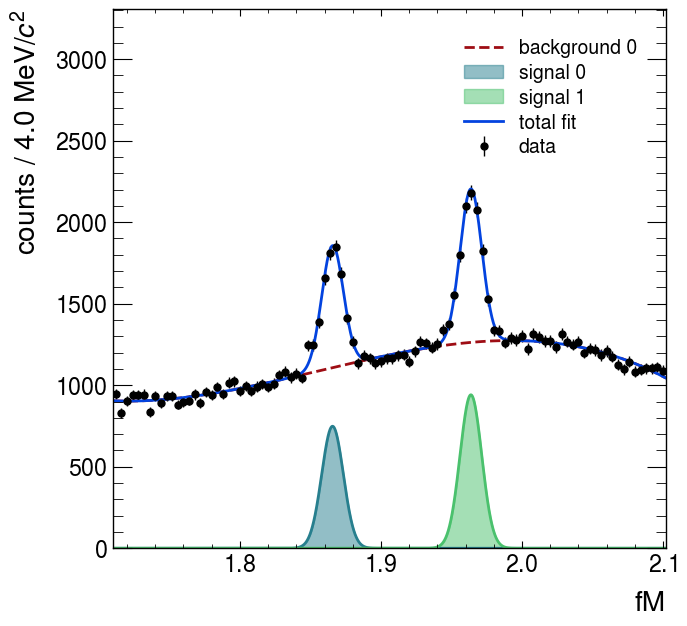

In [20]:
fig = fitters[0].plot_mass_fit(style="ATLAS",
                    show_extra_info=False,
                    extra_info_loc=['upper left', 'center right'])


In [22]:
type(fig)

matplotlib.figure.Figure

In [17]:
fitter = F2MassFitter(data_handler=data,
                      name_signal_pdf=signal_pdfs,
                      name_background_pdf=background_pdfs,
                      name=f"2{background_pdfs[expo_id]}_{signal_pdfs[DplusId]}_{signal_pdfs[DsId]}")

In [18]:
fitter.set_particle_mass(DsId, mass = 1.968)
fitter.set_particle_mass(DplusId, mass = 1.868)
fitter.set_signal_initpar(DsId, "sigma", 0.01, limits=[0.001, 0.3])
fitter.set_signal_initpar(DplusId, "sigma", 0.01, limits=[0.001, 0.3])

fitter.set_background_initpar(expo_id, "lam", -1.5)

In [21]:
fitter.mass_zfit()

NameAlreadyTakenError: Another parameter is already named 2powlaw_gaussian_gaussian_mu_signal0. Use a different, unique one.

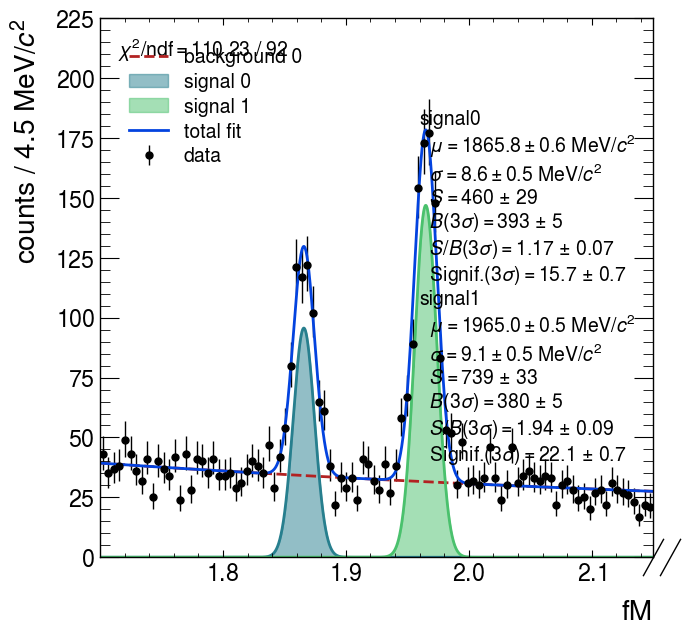

In [20]:
plot_mass_fit = fitter.plot_mass_fit(style="ATLAS",
                    show_extra_info=True,
                    extra_info_loc=['upper left', 'center right'])